<a href="https://colab.research.google.com/github/sinnarasam/jejudo/blob/main/jeju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

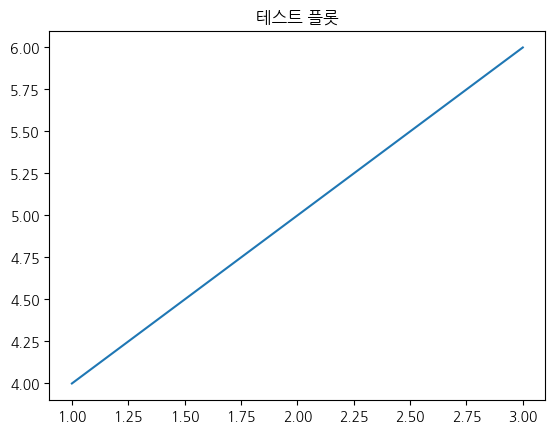

In [1]:
# 1. 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 2. 설치한 폰트를 matplotlib에서 사용할 수 있도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔 고딕 폰트 추가
plt.rcParams['font.family'] = 'NanumGothic'

# 3. 폰트 캐시 리빌드 (수정된 부분)
fm.findSystemFonts(fontpaths=None, fontext='ttf')
# findSystemFonts를 호출하여 폰트 캐시를 업데이트합니다.
# _rebuild는 private method이므로 직접 호출하지 않습니다.

# 4. 경고 메시지 확인용 샘플 플롯 그리기
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('테스트 플롯')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family= 'NanumGothic')

In [4]:
# prompt: 나눔고딕 폰트 설치여부 검사 코드를 알려줘

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_list:
  if 'NanumGothic' in font:
    print(f"나눔고딕 폰트가 설치되어 있습니다: {font}")
    break
else:
  print("나눔고딕 폰트가 설치되어 있지 않습니다.")


나눔고딕 폰트가 설치되어 있습니다: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [19]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.set_index('측정 연도', inplace=True)
print(df)

       측정 월 정점명     수온
측정 연도                 
2004     11  대정  21.37
2005     11  대정  21.75
2006     11  대정  20.91
2007     11  대정  21.61
2008     11  대정  22.66
...     ...  ..    ...
2017     11  한림  21.59
2018     11  한림  19.53
2019     11  한림  20.91
2020     11  한림  20.19
2021     11  한림  19.20

[126 rows x 3 columns]


2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.
대정, 서귀포, 성산포, 제주, 조천, 표선, 한림

알아 보고 싶은 정점명을 입력해 주세요: 한림


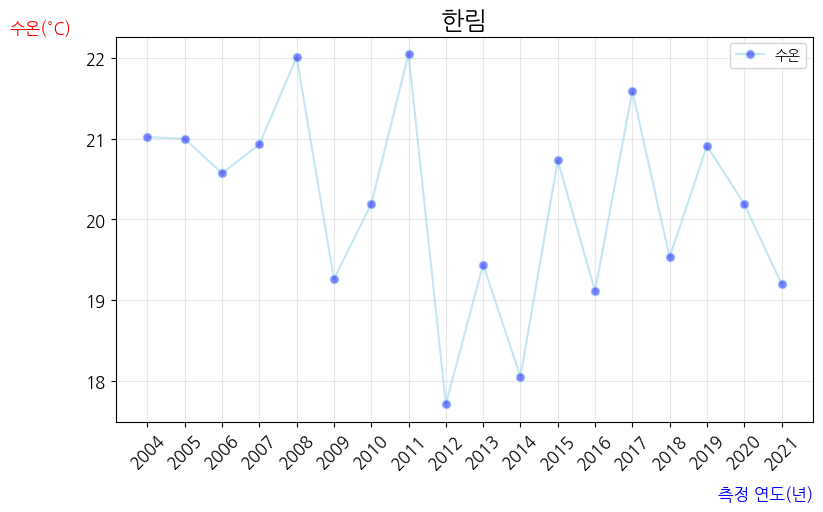

In [20]:
arr = df['정점명']
result = [] # 중복 제거된 값들이 들어갈 리스트

for value in arr:
    if value not in result:
        result.append(value)

n = 0
print('2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.')
for i in result:
    n += 1
    if n < 7:
      print(i, end=', ')
    else:
      print(i, end='')

print('\n')
location = input(f'알아 보고 싶은 정점명을 입력해 주세요: ')

if location not in result:
  print('\n')
  print("잘못 입력되어 자동으로 '제주'로 선택되었습니다.")
  location = '제주'

plt.figure(figsize=(9, 5))
df = df[df["정점명"] == location]
last_water_temperature = df.iloc[-1, -1]
df["수온"].plot(color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6)
plt.xticks(np.arange(2004, 2022).tolist()  , rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=12)
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=12)
plt.grid(alpha=0.3)
plt.title(location, size=18)
plt.legend()
plt.savefig('/content/drive/MyDrive/data/view-1.png')
plt.show()

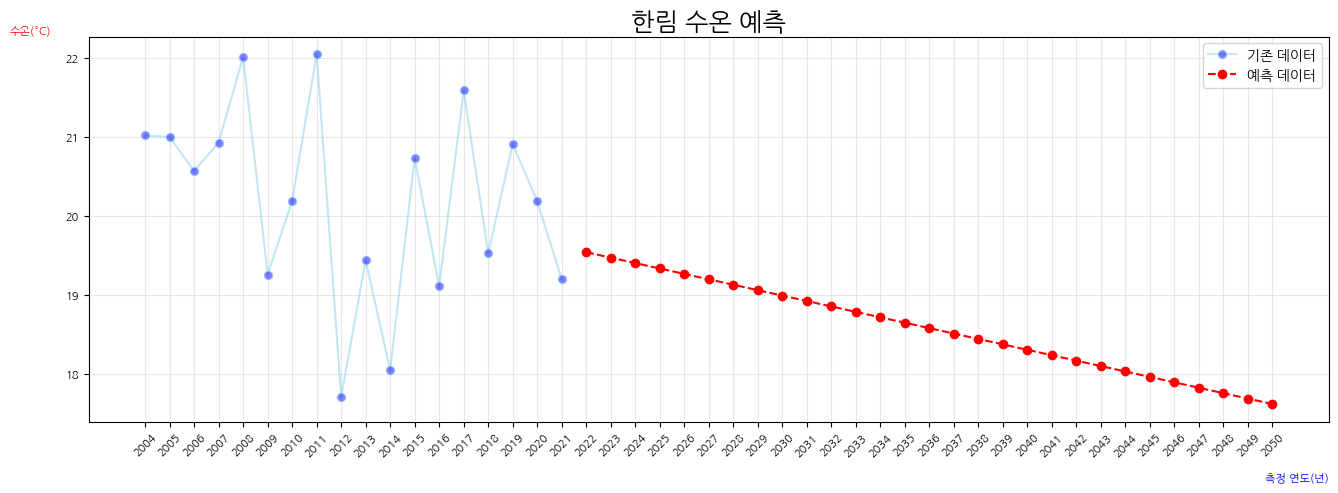

In [21]:
# 선형 회귀 모델을 사용하기 위해 LinearRegression 클래스를 가져옴
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델을 사용하여 2022년부터 2050년까지의 수온 예측
years = df.index.values.reshape(-1, 1)  # 인덱스(연도)를 2차원 배열로 변환합니다.
temperatures = df["수온"].values  # '수온' 열의 값을 배열로 가져옵니다.

model = LinearRegression()  # 선형 회귀 모델 객체를 만듭니다.
model.fit(years, temperatures)  # 모델을 학습시킵니다.

future_years = np.arange(2022, 2051).reshape(-1, 1)  # 2022년부터 2050년까지의 연도를 배열로 만듭니다.
predicted_temperatures = model.predict(future_years)  # 미래 연도의 수온을 예측합니다.

# 예측 결과 시각화
plt.figure(figsize=(16, 5))
plt.plot(df.index, df["수온"], color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6, label='기존 데이터')  # 기존 데이터를 그래프로 그립니다.
plt.plot(future_years, predicted_temperatures, color="red", linestyle='--', marker='o', markerfacecolor='red', markersize=6, label='예측 데이터')  # 예측 데이터를 그래프로 그립니다.
plt.xticks(np.arange(2004, 2051), rotation=45, fontsize=8)  # x축 눈금을 설정합니다.
plt.yticks(fontsize=8)  # y축 눈금을 설정합니다.
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=8)  # x축 라벨을 설정합니다.
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=8)  # y축 라벨을 설정합니다.
plt.grid(alpha=0.3)  # 격자선을 추가합니다.
plt.title(f'{location} 수온 예측', size=18)  # 그래프 제목을 설정합니다.
plt.legend()  # 범례를 추가합니다.
plt.savefig('/content/drive/MyDrive/data/view-2.png')
plt.show()  # 그래프를 표시합니다.

["Modeling the relationship between sea surface temperature and greenhouse gas concentration" (Environmental Research Letters, 2021)]
해수면 온도(SST)와 대기 중 이산화탄소(CO₂) 및 메탄(CH₄) 농도 간의 관계를 모델링
회귀분석을 통해 함수식을 도출
SST = a + b * CO₂ + c * CH₄ (a, b, c는 회귀계수)
SST = 17.28 + 0.0042 * CO₂ + 0.0017 * CH₄

예측된 한림 2022년의 11월 수온:  23.32도
예측된 한림 2023년의 11월 수온:  23.46도
예측된 한림 2024년의 11월 수온:  22.48도
예측된 한림 2025년의 11월 수온:  24.93도
예측된 한림 2026년의 11월 수온:  24.47도
예측된 한림 2027년의 11월 수온:  24.31도
예측된 한림 2028년의 11월 수온:  23.15도
예측된 한림 2029년의 11월 수온:  23.69도
예측된 한림 2030년의 11월 수온:  23.82도
예측된 한림 2031년의 11월 수온:  24.03도
예측된 한림 2032년의 11월 수온:  24.91도
예측된 한림 2033년의 11월 수온:  24.09도
예측된 한림 2034년의 11월 수온:  23.58도
예측된 한림 2035년의 11월 수온:  24.61도
예측된 한림 2036년의 11월 수온:  22.67도
예측된 한림 2037년의 11월 수온:  25.31도
예측된 한림 2038년의 11월 수온:  23.26도
예측된 한림 2039년의 11월 수온:  25.82도
예측된 한림 2040년의 11월 수온:  25.41도
예측된 한림 2041년의 11월 수온:  25.99도
예측된 한림 2042년의 11월 수온:  24.94도
예측된 한림 2043년의 11월 수온:  24.49도
예측된 한림 2044년의 11월 수온:  25.28도
예측된 한림 2045년의 11월 수온:  22.52도
예측된 한림 2046년의 11월 수온:  23.95도
예측된 한림 2047년의 11월 수온:  25.21도
예측된 한림 2048년의 11월 수온:  22.61도
예측된 한림 2049년의 11월 수온:  24.56도
예측된 한림 2050년의 11월 수온:  23.73도


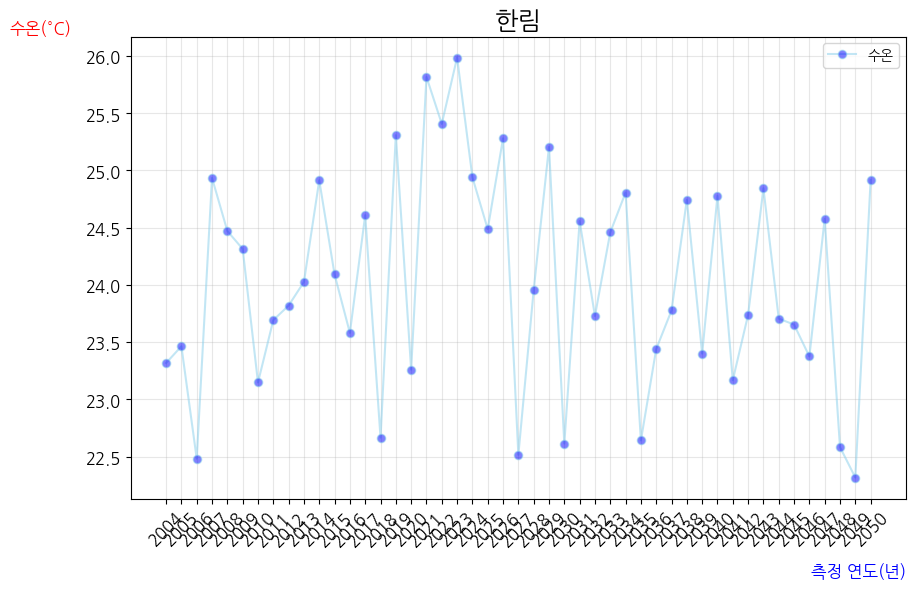

In [22]:
# 주어진 식을 사용하여 예측할 연도 정의
years_to_predict = range(2004, 2051)

# 예측에 사용될 랜덤한 특성 생성
np.random.seed(42)  # 일관된 결과를 위해 시드 설정

# 500 ~ 1200 사이 숫자 두 개로 한 쌍을 만들고 years_to_predict 수 만큼 리스트를 만듦
'''
예) [[ 602  935]
 		 [ 770  606]
 		 [ 571  520]
 		 [1114  621] ...]
'''
features = np.random.randint(500, 1200, size=(len(years_to_predict), 2))

# 주어진 식을 통해 수온 예측
# predicted_temperatures = 17.28 + 0.0042 * features[:, 0] + 0.0017 * features[:, 1]
# features[:, 0] 는 features 리스트 값들 중 첫 번째 값들로 리스트 만듦
# features[:, 1] 는 features 리스트 값들 중 두 번째 값들로 리스트 만듦
predicted_temperatures = last_water_temperature + 0.0042 * features[:, 0] + 0.0017 * features[:, 1]

for year, temp in zip(range(2022, 2051), predicted_temperatures):
    print(f"예측된 {location} {year}년의 11월 수온: {temp: .2f}도")

# 예측 결과를 데이터프레임으로 변환
df = pd.DataFrame({"측정 연도": years_to_predict, "수온": predicted_temperatures})

# 데이터프레임 인덱스 설정
df.set_index('측정 연도', inplace=True)

# 그래프 시각화
plt.figure(figsize=(10, 6))
df["수온"].plot(color="skyblue", alpha=0.5, marker='o', markerfacecolor='blue', markersize=6)
plt.xticks(np.arange(2004, 2051).tolist(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=12)
plt.ylabel('수온(°C)', labelpad=10, loc='top', rotation=360, color='red', size=12)
plt.grid(alpha=0.3)
plt.title(location, size=18)
plt.legend()
plt.savefig('/content/drive/MyDrive/data/view-3.png')
plt.show()

In [23]:
# 선택한 정점의 2050년까지 예측한 수온의 최고 수온과 평균 수온
tempMaxYear = df.index[df['수온']== df['수온'].max()].tolist()
tempMax = round(df['수온'].max(), 2)
tempMean = round(df['수온'].mean(), 2)
print('\n')
print(f'[2022년 ~ 2050년] {location}의 최고 수온과 평균 수온')
print(f'{location}의 최고 수온은 {tempMaxYear[0]}년도 {tempMax} ℃ 입니다.')
print(f'{location}의 평균 수온은 {tempMean} ℃ 입니다.')



[2022년 ~ 2050년] 한림의 최고 수온과 평균 수온
한림의 최고 수온은 2023년도 25.99 ℃ 입니다.
한림의 평균 수온은 24.03 ℃ 입니다.


In [24]:
# 최고 수온일 때 수온의 범위에 따른 해양 생태계 변화 데이터
print('\n')
print(f'{location}의 최고 수온 {tempMax} ℃ 일 때 생길 수 있는 해양 생태계')
if tempMax >= 25:
  print('[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.')
elif tempMax >= 20:
  print('[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.')
elif tempMax >= 15:
  print('[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.')
else:
  print('[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.')



한림의 최고 수온 25.99 ℃ 일 때 생길 수 있는 해양 생태계
[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.


In [25]:
# 평균 수온일 때 수온의 범위에 따른 해양 생태계 변화 데이터
print('\n')
print(f'{location}의 평균 수온 {tempMean} ℃ 일 때 생길 수 있는 해양 생태계')
if tempMean >= 25:
  print('[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.')
elif tempMean >= 20:
  print('[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.')
elif tempMean >= 15:
  print('[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.')
else:
  print('[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.')



한림의 평균 수온 24.03 ℃ 일 때 생길 수 있는 해양 생태계
[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.


In [28]:
# 지난 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family= 'NanumGothic')

df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.set_index('측정 연도', inplace=True)
print(df)

arr = df['정점명']
result = [] # 중복 제거된 값들이 들어갈 리스트

for value in arr:
    if value not in result:
        result.append(value)

n = 0
print('2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.')
for i in result:
    n += 1
    if n < 7:
      print(i, end=', ')
    else:
      print(i, end='')

print('\n')
location = input(f'알아 보고 싶은 정점명을 입력해 주세요: ')

if location not in result:
  print('\n')
  print("잘못 입력되어 자동으로 '제주'로 선택되었습니다.")
  location = '제주'

plt.figure(figsize=(10, 5))
df = df[df["정점명"] == location]
last_water_temperature = df.iloc[-1, -1]

# 온실가스의 CO₂(이산화타소)를 꾸준히 줄여 나갔을 때 정점의 예측 수온
# 주어진 식을 사용하여 예측할 연도 정의
years_to_predict = range(2022, 2051)

# 예측에 사용될 랜덤 숫자 생성(Seed)
import random
randomN = random.randint(1, 43)
np.random.seed(randomN) # 다시 실행할 때마다 다른 결과가 나타남
features = np.random.randint(500, 1200, size=((len(years_to_predict), 2)))

# CO₂를 줄여 나간다고 했을 때의 함수를 적용하여 수온 예측
predicted_temperatures = last_water_temperature \
- 0.0042 * features[:, 0] - 0.0017 * features[:, 1]

# 2022년 ~ 2050년 동안의 수온 예측
for year, temp in zip(range(2022, 2051), predicted_temperatures):
  print(f"예측된 {location} {year}년의 11월 수온: {temp: .2f}도")

       측정 월 정점명     수온
측정 연도                 
2004     11  대정  21.37
2005     11  대정  21.75
2006     11  대정  20.91
2007     11  대정  21.61
2008     11  대정  22.66
...     ...  ..    ...
2017     11  한림  21.59
2018     11  한림  19.53
2019     11  한림  20.91
2020     11  한림  20.19
2021     11  한림  19.20

[126 rows x 3 columns]
2050년 바다 수온을 알아 보고 싶은 제주도 수역을 아래에서 고르세요.
대정, 서귀포, 성산포, 제주, 조천, 표선, 한림

알아 보고 싶은 정점명을 입력해 주세요: 한림
예측된 한림 2022년의 11월 수온:  15.44도
예측된 한림 2023년의 11월 수온:  13.79도
예측된 한림 2024년의 11월 수온:  12.96도
예측된 한림 2025년의 11월 수온:  14.50도
예측된 한림 2026년의 11월 수온:  14.76도
예측된 한림 2027년의 11월 수온:  13.79도
예측된 한림 2028년의 11월 수온:  15.57도
예측된 한림 2029년의 11월 수온:  14.76도
예측된 한림 2030년의 11월 수온:  14.62도
예측된 한림 2031년의 11월 수온:  14.58도
예측된 한림 2032년의 11월 수온:  14.91도
예측된 한림 2033년의 11월 수온:  13.29도
예측된 한림 2034년의 11월 수온:  15.72도
예측된 한림 2035년의 11월 수온:  14.63도
예측된 한림 2036년의 11월 수온:  12.57도
예측된 한림 2037년의 11월 수온:  14.31도
예측된 한림 2038년의 11월 수온:  13.35도
예측된 한림 2039년의 11월 수온:  14.51도
예측된 한림 2040년의 11월 수온:  14.49도
예측된 한림 204

<Figure size 1000x500 with 0 Axes>

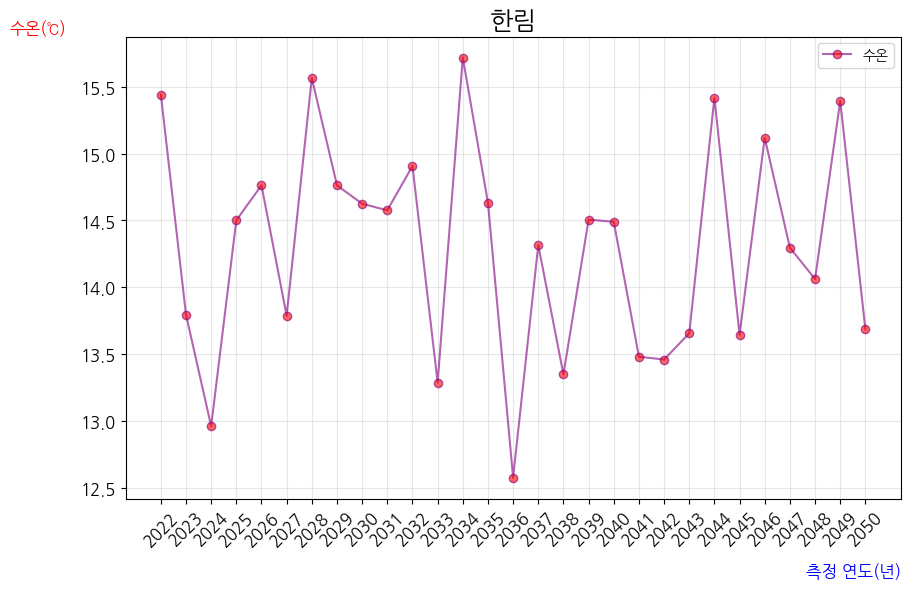

In [30]:
# 데이터프레임을 사용하여 그래프 그리기
# 예측 결과를 데이터프레임으로 변환
df = pd.DataFrame({"측정 연도": years_to_predict, "수온": predicted_temperatures})

# 데이터프레임 인덱스 설정
df.set_index('측정 연도', inplace=True)
# 그래프 시각화
plt.figure(figsize=(10, 6))
df["수온"].plot(color="purple", alpha=0.6, marker='o', markerfacecolor='red', markersize=6)
plt.xticks([i for i in range(2022, 2051)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('측정 연도(년)', labelpad=10, loc='right', color='blue', size=12)
plt.ylabel('수온(℃)', labelpad=10, loc='top', rotation=360, color='red', size=12)
plt.grid(alpha=0.3)
plt.title(location, size=18)
plt.legend()
plt.savefig('/content/drive/MyDrive/data/view-5.png')
plt.show()

In [31]:
# 선택한 정점의 2050년까지 예측한 수온의 가장 높은 수온과 가장 낮은 수온, 평균 수온
tempMaxYear = df.index[df['수온']== df['수온'].max()].tolist()
tempMinYear = df.index[df['수온']== df['수온'].min()].tolist()
tempMax = round(df['수온'].max(), 2)
tempMin = round(df['수온'].min(), 2)
tempMean = round(df['수온'].mean(), 2)
print(f'[2022년 ~ 2050년] {location}의 가장 높은 수온과 가장 낮은 수온, 평균 수온')
print(f'{location}의 가장 높은 수온은 {tempMaxYear[0]}년도 {tempMax} ℃ 입니다.')
print(f'{location}의 가장 낮은 수온은 {tempMinYear[0]}년도 {tempMin} ℃ 입니다.')
print(f'{location}의 평균 수온은 {tempMean} ℃ 입니다.')
print('\n-------------------------\n')
# 가장 높은 수온일 때 수온의 범위에 따른 해양 생태계 변화 데이터
print(f'{location}의 가장 높은 수온 {tempMax} ℃ 일 때 생길 수 있는 해양 생태계')
if tempMax >= 25:
  print('[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.')
elif tempMax >= 20:
  print('[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.')
elif tempMax >= 15:
  print('[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.')
else:
  print('[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.')
print('\n-------------------------\n')
# 가장 낮은 수온일 때 수온의 범위에 따른 해양 생태계 변화 데이터
print(f'{location}의 가장 낮은 수온 {tempMin} ℃ 일 때 생길 수 있는 해양 생태계')
if tempMin >= 25:
  print('[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.')
elif tempMin >= 20:
  print('[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.')
elif tempMin >= 15:
  print('[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.')
else:
  print('[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.')
print('\n-------------------------\n')
# 평균 수온일 때 수온의 범위에 따른 해양 생태계 변화 데이터
print(f'{location}의 평균 수온 {tempMean} ℃ 일 때 생길 수 있는 해양 생태계')
if tempMean >= 25:
  print('[심각] 열대성 유해조류 발생 가능성 증가와 수질 저하 가능성이 증가합니다.')
elif tempMean >= 20:
  print('[경계] 유해조류 발생 가능성 증가와 해양 생태계 변화 가능성이 증가합니다.')
elif tempMean >= 15:
  print('[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.')
else:
  print('[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.')

[2022년 ~ 2050년] 한림의 가장 높은 수온과 가장 낮은 수온, 평균 수온
한림의 가장 높은 수온은 2034년도 15.72 ℃ 입니다.
한림의 가장 낮은 수온은 2036년도 12.57 ℃ 입니다.
한림의 평균 수온은 14.3 ℃ 입니다.

-------------------------

한림의 가장 높은 수온 15.72 ℃ 일 때 생길 수 있는 해양 생태계
[주의] 해조류의 분포 및 생장에 변화가 생길 수 있습니다.

-------------------------

한림의 가장 낮은 수온 12.57 ℃ 일 때 생길 수 있는 해양 생태계
[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.

-------------------------

한림의 평균 수온 14.3 ℃ 일 때 생길 수 있는 해양 생태계
[양호] 해양 생태계가 안정적이지만 주의가 필요합니다.
